# Лаб 2: Secret-Key Encryption Lab

*17B1NUM0662 Бямбаа Баярмандах*

*Мэдээлэл Технологи-4*

## Setup
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/byambaa0325/seed-security-labs/blob/master/notebooks/lab2-report.ipynb)

(Recommended) Тайланг Google Colab клоүд платформ дээр интерактив Jupyter Notebook-ээр бэлдсэн тул шууд ажлуулаад туршиж болно. Дээрх товчийг дараад Google Colab нөүтбүүк instance үүсгээд ажлуулж болно.

(Not Recommended) Хэрвээ өөрийн машин дээрээ ажлуулж байгаа бол [дараах линкээр](https://seedsecuritylabs.org/lab_env.html) ороод VM-ээ setup хийгээд нөүтбүүк дээр байгаа кодны нүднүүдийг хуулаад ажлуулж болно. 

Jupyter notebook ажиллуулах зааврыг [энэхүү линкээс](https://colab.research.google.com/notebooks/intro.ipynb) аваарай. Ерөнхийдөө, ажиллуулах нүдээ сонгоод `shift+enter` дараад байхад болно.


Лабуудад хэрэгтэй файлуудаа татах:

In [1]:
!wget https://seedsecuritylabs.org/Labs_16.04/Crypto/Crypto_Encryption/files/ciphertext.txt -q
!wget https://seedsecuritylabs.org/Labs_16.04/Crypto/Crypto_Encryption/files/pic_original.bmp -q
!wget https://seedsecuritylabs.org/Labs_16.04/Crypto/Crypto_Encryption/files/words.txt -q

Жич: -q flag-ийг командын хэвлэлтийг нуухийн тулд нэмсэн болно. Татагдаж байгаа эсхийг шалгавал flag-ийг арилгаад нүдийг дахин ажлуулаарай.

## Дасгал 1: Frequency Analysis

### Тайлбар
Monoalphabetic substitution cipher нь текстийн үсгүүдийг солбин цифрлэх аргыг хэлдэг. Гэвч энэ арга нь найдвартай биш ба үсгийн давтамжын анализ буюу Frequence Analysis аргаар үүнийг тайлж болдог. Энэний учир нь тухайн хэлний үсгийн давтагдах шинж чанар нь текстүүд дээр хадгалагдаж үлддэг тул үүнийг ашиглан тайлж болдог.

Үүнийг туршиж үзхийн тулд жишээ текстийг цифрлэе:


In [2]:
%%writefile sample_text.txt
Hello this is unencrypted text

Overwriting sample_text.txt


Дээрх cell-д байх текст нь `"sample_text.txt"` файл болон бичигдсэн байгаа. Үүнийг хувиргалт хийхээсээ өмнө нь хөнгөвчлөе.

In [3]:
! tr [:upper:] [:lower:] < sample_text.txt > sample_lowercase.txt
! tr -cd ’[a-z][\n][:space:]’ < sample_lowercase.txt > sample_plaintext.txt

Текстийг хувиргахын тулд жишээ encryption key үүсгэцгээе.

In [4]:
import random
alphabet = "abcdefghijklmnopqrstuvwxyz"
list = random.sample(alphabet, len(alphabet))
"".join(list)

'xfsirgnyzpduebakhjtcqlvwom'

Дээрх түлхүүрийг ашиглан `"sample_text.txt"` файлыг цифрлэе.

In [5]:
! tr ’abcdefghijklmnopqrstuvwxyz’ ’pwsnqaukbftyvmjercihdzglxo’ \
< sample_plaintext.txt > sample_ciphertext.txt

Цифрлэсэн файлаа хэвлэж үзвэл:

In [6]:
! cat sample_ciphertext.txt

kqyyj hkbi bi dmqmscxehqn hqlh

### Даалгавар

#### Аргачлал
Жишээ файлыг цифрлэж үзлээ. Одоо харин өөр түлхүүрээр цифрлэсэн текст нийтлэлийг тайлах дасгал хийцгээе.

Цифрлэгдсэн нийтлэлийн эхлэлийг харж үзвэл:

In [7]:
! head ciphertext.txt  

ytn xqavhq yzhu  xu qzupvd ltmat qnncq vgxzy hmrty vbynh ytmq ixur qyhvurn
vlvhpq yhme ytn gvrrnh bnniq imsn v uxuvrnuvhmvu yxx

ytn vlvhpq hvan lvq gxxsnupnp gd ytn pncmqn xb tvhfnd lnmuqynmu vy myq xzyqny
vup ytn veevhnuy mceixqmxu xb tmq bmic axcevud vy ytn nup vup my lvq qtvenp gd
ytn ncnhrnuan xb cnyxx ymcnq ze givasrxlu eximymaq vhcavupd vaymfmqc vup
v uvymxuvi axufnhqvymxu vq ghmnb vup cvp vq v bnfnh phnvc vgxzy ltnytnh ytnhn
xzrty yx gn v ehnqmpnuy lmubhnd ytn qnvqxu pmpuy ozqy qnnc nkyhv ixur my lvq
nkyhv ixur gnavzqn ytn xqavhq lnhn cxfnp yx ytn bmhqy lnnsnup mu cvhat yx
vfxmp axubimaymur lmyt ytn aixqmur anhncxud xb ytn lmuynh xidcemaq ytvusq


**Үүнийг бид дараах алхмуудаар тайлах болно.**


1.   Жишээ хангалттай том текстийн давтамжийг анализ хийнэ.
2.   Жишээ текстийн үсгүүдийг давтамжаар нь жагсаан түлхүүр гарган авна.
3.   Цифрлэгдсэн текстийг мөн анализ хийж түлхүүр гарган авна.
4.   Түлхүүр тайлагдтал дараах үйлдлийг давтана:
  - Түлхүүрээрээ тайлж үзнэ.
  - Хэр сайн байгааг шалгана.
  - Аль үсгүүдийн байр солигдсон байгааг таан түлхүүрэнд өөрчлөлт хийнэ.

Бид жишээ текстээр Romeo & Juliet-ийг ашиглана.



In [8]:
!wget --output-document=corpus.txt https://www.gutenberg.org/files/1112/1112.txt -q

Хэрвээ дээрх линк ажилгаагүй байвал ашиглах нөөц линк:

In [9]:
! wget --output-document=corpus.txt https://archive.org/download/romeoandjuliet01777gut/1ws1611.txt -q

Дасгал 7-д англи хэлний үгийн сантай ажиллах ба үүнд зориулж аль хэдийн англи хэлний үгийн сан татаж авсныг ашиглаад хэр сайн тайлснаа шалгах барагцаа хэмжүүр гаргая.

In [10]:
def test_word_accuracy(text_file_path):
  """ Measure text validity by checking if every word is valid word in English
  language dictionary. Returns total number of valid words along with accuracy 
  measure.

  Args:
  text_file_path - Specifies the sample text path

  Hidden Parameters:
  Corpus location - "words.txt"
  """

  # Make sure we have a path
  assert text_file_path is not None

  # Load dictionary that is a set of every words
  with open ("words.txt", "r") as english_dictionary:
    word_dictionary = set(english_dictionary.read().split("\n"))
  
  # Load text file
  with open (text_file_path, "r") as test_text:
    words = test_text.read().split(" ")
  
  valid_words = 0
  text_length = len(words)
  for word in words:
    if word in word_dictionary:
      valid_words += 1
  
  print("Total valid word count {}".format(valid_words))
  print("Word Accuracy {:.2f}%".format((valid_words/text_length)*100))
  return valid_words/text_length

Одоо байгаа цифрлэгдсэн текстийн үзүүлэлт.

In [11]:
# Test our current cipher text
test_word_accuracy("ciphertext.txt")

Total valid word count 43
Word Accuracy 5.80%


0.057951482479784364

Жишээ болгож татсан текстийн корпусаа анализ хийцгээе.

In [12]:
from collections import Counter

def count_text_frequency(items, file_path):
  """ Counts frequency of items in a text given a file path. Returns a Counter
  object that contains frequency of every item in the items to count.

  Args:
  items - a list of string to count in the text. Must be same length.
  file_path - a path to the file containing the text.
  """
  # Initialize a Counter with 0 values for each item
  text_frequency = Counter()
  for item in items:
    text_frequency[item] = 0
  
  # We will check the text for same length parts in items to search for.
  item_length = len(items[0])
  with open (file_path, "r") as text_file:
      sample_text = text_file.read().lower() # transform the file
      for index in range(len(sample_text)):
        part = sample_text[index:index+item_length] # extract a part
        if part in items:
          text_frequency[part] += 1
  return text_frequency

Дээрх функцаар файлын текстед орших тодорхой нэгжүүдийг тоолох ба бидний хувьд цагаан толгойн үсгүүдийг тоолно.

In [13]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
sample_text_frequency = count_text_frequency(alphabet, "corpus.txt")
print(sample_text_frequency)

Counter({'e': 13511, 't': 10275, 'o': 9331, 'a': 8687, 'i': 7427, 'r': 7180, 'h': 7171, 's': 7121, 'n': 6992, 'l': 5155, 'd': 4264, 'u': 3826, 'm': 3695, 'y': 2834, 'w': 2687, 'c': 2530, 'f': 2260, 'g': 1988, 'b': 1937, 'p': 1768, 'v': 1137, 'k': 884, 'j': 312, 'x': 204, 'q': 70, 'z': 36})


Дээрх үзүүлэлтийг жагсаавал

In [14]:
def get_ranked_key_dict_by_value(dictionary):
  """ Given a dictionary return the keys sorted descendingly by its value"""
  return [v for v in sorted(dictionary, key=dictionary.get, reverse=True)]

sample_text_frequency_ranked = get_ranked_key_dict_by_value(sample_text_frequency)

Үүнийг түлхүүрээ болгон хувиргавал

In [15]:
decipher_key = ''.join(sample_text_frequency_ranked)

#### Тайлах

Түлхүүрээ ашиглан цифрийг тайлая.

In [16]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etoarnhsildumycwfgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

Илүү оновчтой болсон байгааг харж болно гэхдээ хангалттай биш

In [17]:
test_word_accuracy("plaintext.txt")

Total valid word count 120
Word Accuracy 16.17%


0.16172506738544473

Хувирсан текстээ ашиглаад үзвэл, "tie" гэсэн олон үгнүүд байгааг харж болно. Ижилхэн урттай гэхдээ англи текстд ижил хэмжээгээр ихээр давтагдах үг бол "the" юм. Иймд. 'i' болон 'h'-ийн байрлалыг солиод хувиргая.

In [18]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etoarnishldumycwfgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

Оновч 5%-иар ихэссэн байна. Үргэлжлүүлэе

In [19]:
test_word_accuracy("plaintext.txt")

Total valid word count 150
Word Accuracy 20.22%


0.20215633423180593

"taa" гэх эхний цогцолборийн сүүлийн үг нь "too" байх магадлалтай тул. 'a' болон 'o'-г солив.

In [20]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaornishldumycwfgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

Нэмээд 5%-ийн өсөлт

In [21]:
test_word_accuracy("plaintext.txt")

Total valid word count 188
Word Accuracy 25.34%


0.25336927223719674

"lorg" нь "long" байгаа гэвэл. 'r'-г 'n'-ээр солиод.

In [22]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonrishldumycwfgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [23]:
test_word_accuracy("plaintext.txt")

Total valid word count 227
Word Accuracy 30.59%


0.3059299191374663

"thir" нь "this" байх боломжтой тул. 'r' ба 's'

In [24]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldumycwfgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [25]:
test_word_accuracy("plaintext.txt")

Total valid word count 296
Word Accuracy 39.89%


0.39892183288409705

Яг энэхүү процессоо тайлагдтал текстээ хараад өөрчлөөд байна.

In [26]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmycfwgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [27]:
test_word_accuracy("plaintext.txt")

Total valid word count 340
Word Accuracy 45.82%


0.4582210242587601

In [28]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmuyfwgbpvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [29]:
test_word_accuracy("plaintext.txt")

Total valid word count 358
Word Accuracy 48.25%


0.48247978436657685

In [30]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmupfwgbyvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [31]:
test_word_accuracy("plaintext.txt")

Total valid word count 384
Word Accuracy 51.75%


0.5175202156334232

In [32]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmupfbgwyvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [33]:
test_word_accuracy("plaintext.txt")

Total valid word count 410
Word Accuracy 55.26%


0.5525606469002695

In [34]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmuwfbgpyvkjxqz’ \
< ciphertext.txt > plaintext.txt

In [35]:
test_word_accuracy("plaintext.txt")

Total valid word count 471
Word Accuracy 63.48%


0.6347708894878706

In [36]:
!tr ’nyvxuqmhtipaczlbgredfsjkow’ ’etaonsirhldcmuwfbgpyvkqxjz’ \
< ciphertext.txt > plaintext.txt

In [37]:
test_word_accuracy("plaintext.txt")

Total valid word count 477
Word Accuracy 64.29%


0.6428571428571429

Одоогийн байдлаар текст аль хэдийн жирийн текст болсон байгаа тул тайлах түлхүүрийг оллоо гэж хэлж болно.

In [38]:
!head plaintext.txt

the oscars turn  on sunday which seems about right after this long strange
awards trip the bagger feels like a nonagenarian too

the awards race was bookended by the demise of harvey weinstein at its outset
and the apparent implosion of his film company at the end and it was shaped by
the emergence of metoo times up blackgown politics armcandy activism and
a national conversation as brief and mad as a fever dream about whether there
ought to be a president winfrey the season didnt just seem extra long it was
extra long because the oscars were moved to the first weekend in march to
avoid conflicting with the closing ceremony of the winter olympics thanks


In [39]:
solution_key = 'etaonsirhldcmuwfbgpyvkqxjz'

## Дасгал 2: Encryption using Different Ciphers and Modes

Янз бүрийн цифрээр encryption хийж үзэцгээе. Туршилтаа доорх файл дээр хийе

In [40]:
%%writefile plain.txt
This is sample text

Overwriting plain.txt


Жишээ цифрийн төрлүүд: `[-aes-128-cbc, -aes-128-ofb, -aes-128-cfb] `

- `-in` \<file> input file
- `-out` \<file> output file
- `-e` encrypt
- `-d` decrypt
- `-K/-iv` key/iv in hex is the next argument
- `-[pP]` print the iv/key (then exit if `-P`)


In [41]:
! openssl enc -aes-128-cbc -e -in plain.txt -out cipher.bin \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length


In [42]:
! openssl enc -aes-128-ofb -in plain.txt -out cipher.bin \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length


In [43]:
! openssl enc -aes-128-cfb -in plain.txt -out cipher.bin \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length


## Дасгал 3: Encryption Mode – ECB vs. CBC

![link text](https://seedsecuritylabs.org/Labs_16.04/Crypto/Crypto_Encryption/files/pic_original.bmp)

Зургийн агуулгыг нуухын тулд encrypt хийнэ. Энэ жишээнд -aes-128-cbc цифрээр encrypt хийе:

In [44]:
! openssl enc -aes-128-cbc -e -in pic_original.bmp -out pic_cbc.bmp \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length


Мөн харьцуулхаар -aes-128-ecb цифрээр encrypt хийе:

In [45]:
! openssl enc -DES-ECB -e -in pic_original.bmp -out pic_ecb.bmp \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too long, ignoring excess


Зургийг нээж үзнэ гэвэл үндсэн зургийн header битүүд болох эхний 54 дээр encrypt хийсэн зургийн контентийг нэмснээр харж болно. Ингэснээр зөв форматтай зурган файл болно.

In [46]:
! head -c 54 pic_original.bmp > header
! tail -c +55 pic_ecb.bmp > body
! cat header body > new_ecb.bmp

In [47]:
! head -c 54 pic_original.bmp > header
! tail -c +55 pic_cbc.bmp > body
! cat header body > new_cbc.bmp

Зургийг үзхийн тулд workspace-д үүссэн `new_cbc.bmp`-г татаад үзэж болно.

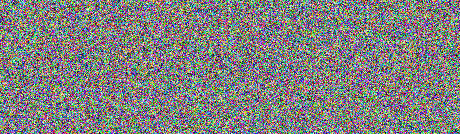

`new_ecb.bmp`-ийн хувьд 

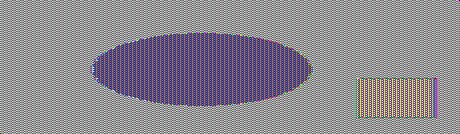

Үүснээс хархад зургийн анхны контент-д юу байсныг EBC цифрээр encrypt хийсэн файлд харж болж байна.

## Дасгал 4: Padding

Блокийн хэмжээ зөрөх үед нэмэлт Padding хийдэг ба ихэнхдээ PKCS#5 padding ашигладаг. Үүнийг ECB, CBC, CFB, and OFB горимуудын аль нэгээр туршицгаая:

Эхлээд 5, 10, 16 битийн урттай 3 файл үүсгэцгээе.

In [48]:
! echo -n "12345" > FiveBytes.txt
! echo -n "1234512345" > TenBytes.txt
! echo -n "1234123412341234" > HexBytes.txt

Файлуудаа тус тус AES-128-CBC горимоор encrypt хийнэ. Ингэхэд блокийн хэмжээ зөрсөн учир нэмэлт padding хийх үйлдэл давхар хийгдсэн байгаа. Гэвч бид шууд хэр их padding орсныг харж чадахгүй. Учир нь decrypt хийх үйлдэлд мөн давхар padding-ийг арилгах үйлдэл хийгддэг болхоор decrypt хийгдсэн файл анхны хэвэндээ буцаж орсон байна.

In [49]:
! openssl enc -aes-128-cbc -e -k pass -in FiveBytes.txt -out FiveBytes_cbc.txt
! openssl enc -aes-128-cbc -e -k pass -in TenBytes.txt -out TenBytes_cbc.txt
! openssl enc -aes-128-cbc -e -k pass -in HexBytes.txt -out HexBytes_cbc.txt

*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.


Гэхдээ decrypt хийх командад -nopad гэх флаг байдаг ба үүнийг ашиглан padding-ийг арилгахгүйгээр decrypt хийж харж болно.

Энэхүү флагтайгаар decrypt хийцгээе

In [50]:
! openssl enc -aes-128-cbc -d -k pass -in FiveBytes_cbc.txt -out FiveBytes_dec.txt -nopad
! openssl enc -aes-128-cbc -d -k pass -in TenBytes_cbc.txt -out TenBytes_dec.txt -nopad
! openssl enc -aes-128-cbc -d -k pass -in HexBytes_cbc.txt -out HexBytes_dec.txt -nopad

*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.


Файлуудаа тус тус хэвлэвэл ямар төрлөөр padding хийснийг харж болно. Үүнийг цаашлаад Hex Editor ашиглан ямар битээр padding хийснийг нь харж болно.

In [51]:
! hexdump -C FiveBytes_dec.txt 

00000000  31 32 33 34 35 0b 0b 0b  0b 0b 0b 0b 0b 0b 0b 0b  |12345...........|
00000010


In [52]:
! hexdump -C TenBytes_dec.txt

00000000  31 32 33 34 35 31 32 33  34 35 06 06 06 06 06 06  |1234512345......|
00000010


In [53]:
! hexdump -C HexBytes_dec.txt

00000000  31 32 33 34 31 32 33 34  31 32 33 34 31 32 33 34  |1234123412341234|
00000010  10 10 10 10 10 10 10 10  10 10 10 10 10 10 10 10  |................|
00000020


## Дасгал 5: Error Propagation – Corrupted Cipher Text

Encryption алгоритмуудын алдаа түгэлтийн шинжийг туршина. Encrypt хийсэн файлын бит corrupt хийгдсэн тохиолдолд буцаан decrypt хийх үед энэхүү алдаа бусад хэсгүүддээ хэрхэн нөлөөлдөг мөн алгоритмийн горимууд тус тус алдааг хэр түгээдгийг харах болно.
1. Ядаж 1000бит файл дээр.
2. Encrypt хийгээд.
3. 55 дах битийг өөрчлөн эвдэнэ.
4. Буцаад Decrypt хийнэ.

Энэхүү процессын дараа өөр өөр Encryption алгоритмууд хэр алдаа багатай өгөгдлийг буцаан Decrypt хийхийг харая.

Даалгавар 1-д ашигласан текстийг ашиглая.

In [54]:
! openssl enc -aes-128-ecb -e -k pass -in plaintext.txt -out plaintext_ecb.txt
! openssl enc -aes-128-cbc -e -k pass -in plaintext.txt -out plaintext_cbc.txt
! openssl enc -aes-128-cfb -e -k pass -in plaintext.txt -out plaintext_cfb.txt
! openssl enc -aes-128-ofb -e -k pass -in plaintext.txt -out plaintext_ofb.txt

*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.


Ямар ч хамаагүй 1 бит аваад dummy гэж нэрлэе.

In [55]:
! head -c 1 plaintext.txt > dummy

In [56]:
! cat dummy

t

Энэхүү dummy битээ encrypt хийсэн файлуудынхаа 55 дахь битийн оронд оруулан шинээр файлаа залгая.

In [57]:
! head -c 54 plaintext_ecb.txt > first
! tail -c +56 plaintext_ecb.txt > second
! cat first dummy second > corrupted_plaintext_ecb.txt

! head -c 54 plaintext_cbc.txt > first
! tail -c +56 plaintext_cbc.txt > second
! cat first dummy second > corrupted_plaintext_cbc.txt

! head -c 54 plaintext_cfb.txt > first
! tail -c +56 plaintext_cfb.txt > second
! cat first dummy second > corrupted_plaintext_cfb.txt

! head -c 54 plaintext_ofb.txt > first
! tail -c +56 plaintext_ofb.txt > second
! cat first dummy second > corrupted_plaintext_ofb.txt

Corrupt хийгдсэн файлаа буцаад decrypt хийцгээе.

In [58]:
! openssl enc -aes-128-ecb -d -k pass -in corrupted_plaintext_ecb.txt -out dec_plaintext_ecb.txt
! openssl enc -aes-128-cbc -d -k pass -in corrupted_plaintext_cbc.txt -out dec_plaintext_cbc.txt
! openssl enc -aes-128-cfb -d -k pass -in corrupted_plaintext_cfb.txt -out dec_plaintext_cfb.txt
! openssl enc -aes-128-ofb -d -k pass -in corrupted_plaintext_ofb.txt -out dec_plaintext_ofb.txt

*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.


Тайлагдсан файлын corrput хийгдсэн байдлыг хэвлэж харцгаая. Жишээ болгож ecb горимийн corruption-г гаргалаа. Энэхүү файлын нэрийг тохирох горимоор нь солиод бусад файлыг хараарай.



```
dec_plaintext_ecb.txt
dec_plaintext_cbc.txt
dec_plaintext_cfb.txt
dec_plaintext_ofb.txt
```



In [59]:
! head -c 120 dec_plaintext_ecb.txt | hexdump -C

00000000  74 68 65 20 6f 73 63 61  72 73 20 74 75 72 6e 20  |the oscars turn |
00000010  20 6f 6e 20 73 75 6e 64  61 79 20 77 68 69 63 68  | on sunday which|
00000020  4e 58 ef 32 46 a5 57 ff  68 2a 5c 15 11 17 34 1f  |NX.2F.W.h*\...4.|
00000030  68 74 20 61 66 74 65 72  20 74 68 69 73 20 6c 6f  |ht after this lo|
00000040  6e 67 20 73 74 72 61 6e  67 65 0a 61 77 61 72 64  |ng strange.award|
00000050  73 20 74 72 69 70 20 74  68 65 20 62 61 67 67 65  |s trip the bagge|
00000060  72 20 66 65 65 6c 73 20  6c 69 6b 65 20 61 20 6e  |r feels like a n|
00000070  6f 6e 61 67 65 6e 61 72                           |onagenar|
00000078


Үүнээс аль горимуудад алдаа хэр их түгсэн байгааг харж болно.

## Дасгал 6: Initial Vector (IV) and Common Mistakes



### Тайлбар

Ихэнх encrypt хийх алгоритмууд нь анхны вектор буюу initial vector (IV) ашигладаг. Үүний ямар байх нь ихэнхдээ тухайн encrypt хийх схемээс шалтгаалдаг. Гэвч, бид энэ векторийг анхааралтай сонгохгүй бол ямар алгоритм ашиглахаас эс хамааран аюулгүй бус хамгаалалт болдог. Иймд, түгээмэл гаргадаг алдаанууд ба анхны векторын хэрэглээг судлая.

Анхны векторын гол зүйл нь давтагдашгүй байдал байдаг. Нэг түлхүүр дээр ижил анхны вектор ашиглан encrypt хийх нь эрсдэлтэй. Яагаад ийм байдгийг туршиж үзье. 

In [60]:
!cat plain.txt

This is sample text

In [61]:
!hexdump -C plain.txt

00000000  54 68 69 73 20 69 73 20  73 61 6d 70 6c 65 20 74  |This is sample t|
00000010  65 78 74                                          |ext|
00000013


Дээрх файлыг encrypt хийе:

In [62]:
! openssl enc -aes-128-ofb -e -in plain.txt -out plain_enc_iv_same1.txt \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708
! openssl enc -aes-128-ofb -e -in plain.txt -out plain_enc_iv_same2.txt \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length
hex string is too short, padding with zero bytes to length


In [63]:
!hexdump -C plain_enc_iv_same1.txt

00000000  d3 ee e6 56 e1 56 c9 f1  dc ff d2 6d 19 75 7c 19  |...V.V.....m.u|.|
00000010  54 2c ed                                          |T,.|
00000013


In [64]:
!hexdump -C plain_enc_iv_same2.txt

00000000  d3 ee e6 56 e1 56 c9 f1  dc ff d2 6d 19 75 7c 19  |...V.V.....m.u|.|
00000010  54 2c ed                                          |T,.|
00000013


Ижил IV ба ижил key-ээр encrypt хийвэл ижил encrypted файл үүснэ

Одоо харин өөр анхны вектор ашиглавал:

In [65]:
! openssl enc -aes-128-ofb -e -in plain.txt -out plain_enc_iv_diff.txt \
-K 00112233445566778889aabbccddeeff \
-iv 0802030405060701

hex string is too short, padding with zero bytes to length


In [66]:
!hexdump -C plain_enc_iv_diff.txt

00000000  74 d1 6b 45 e6 6e fe 37  d6 49 46 b5 70 c5 52 94  |t.kE.n.7.IF.p.R.|
00000010  e8 41 61                                          |.Aa|
00000013


Encrypt хийсэн файлын hex өөр байгаа нь анзаарагдана.

Харин өөр текст файлыг ижил IV-аар encrypt хийвэл:


In [67]:
%%writefile plain_diff.txt
This is actual text

Overwriting plain_diff.txt


In [68]:
! openssl enc -aes-128-ofb -e -in plain.txt -out plain_enc_iv_same1.txt \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708
! openssl enc -aes-128-ofb -e -in plain_diff.txt -out plain_enc_iv_same2.txt \
-K 00112233445566778889aabbccddeeff \
-iv 0102030405060708

hex string is too short, padding with zero bytes to length
hex string is too short, padding with zero bytes to length


In [69]:
!hexdump -C plain_enc_iv_same1.txt

00000000  d3 ee e6 56 e1 56 c9 f1  dc ff d2 6d 19 75 7c 19  |...V.V.....m.u|.|
00000010  54 2c ed                                          |T,.|
00000013


In [70]:
!hexdump -C plain_enc_iv_same-.txt

hexdump: plain_enc_iv_same-.txt: No such file or directory


Текст файлуудын hex текстээрээ ялгарах хэсэгт л өөр байна. Энэ нь ижил IV-аар файлуудыг encrypt хийвэл аль нэг файлын оригнал хэсгийг олж авбал буцаан бусад файлуудыг decrypt хийх эрсдэлтэй болдог ба үүнийг Known plaintext дайралт гэнэ.

### Даалгавар
Дээрх жишээнээс бид IV-г давтаж ашиглаж болохгүйг анзаарлаа. Гэвч энэ нь хэт ойлгомжтой IV ашиглаж болноо гэсэн үг биш юм. Доорх даалгаврыг гүйцэтгэж үзье.

Эрхэс ба Мишээл хоорондоо нууцалсан мессеж солилцлоо гэе. Энэ мессеж нь "Yes" эсвэл "No" гэсэн утгатай. Үүнийг нууцлахдаа Эрхэс хүчтэй AES алгоритм ашигласан тул Мишээл юу гэснийг нь мэдэхгүй зөвхөн нууцлагдсан текстийг л харж байгаа. Даанч Эрхэс хэтэрхий ойлгомжтой IV ашигладаг тул Мишээл Эрхэсийг ямар IV ашиглахыг мэдэж байгаа бол Мишээл нууцлалыг тайлхын тулд Эрхэсд ахиад файл нууцлаад явуулаад өгөөч гэж асуухаар боллоо гэвэл яаж нууцлалыг тайлах вэ?







```
Encryption method: 128-bit AES with CBC mode.
SEED Labs – Secret-Key Encryption Lab 6
Key (in hex): 00112233445566778899aabbccddeeff (known only to Bob)
Ciphertext (C1): bef65565572ccee2a9f9553154ed9498 (known to both)
  IV used on P1 (known to both)
    (in ascii): 1234567890123456
    (in hex) : 31323334353637383930313233343536
  Next IV (known to both)
    (in ascii): 1234567890123457
    (in hex) : 31323334353637383930313233343537
```



Нууцлал хийхдээ IV-г мессежтэй XOR хийдэг иймд үүнийг нь урвуугаар нь ашиглах боломжтой байдаг. Хэрвээ Мишээл өөрийнх нь явуулах текстийг нууцлахад хэрэглэх IV-г **(IV<sub>Мишээл</sub>)** мэдэж байвал мөн Эрхэсийн хэрэглэсэн IV -г **(IV<sub>Эрхэс</sub>)** мэдэж байвал өөрийн явуулах текст **(P<sub>Мишээл</sub>)**-г дараах байдлаар зохиож болно:

**P<sub>Мишээл</sub> = IV<sub>Мишээл</sub> ⊕ IV<sub>Эрхэс</sub> ⊕ "Yes"**

Үүнийг нь нууцлах үед:

**C<sub>Мишээл</sub> = E<sub>k</sub>(IV<sub>Мишээл</sub> ⊕ P<sub>Мишээл</sub>) = E<sub>k</sub>(IV<sub>Мишээл</sub> ⊕ (IV<sub>Мишээл</sub> ⊕ IV<sub>Эрхэс</sub> ⊕ "Yes"))**

**IV<sub>Мишээл</sub> ⊕ IV<sub>Мишээл</sub>** үйлдэл хийгдхэд бие биенийгээ үгүй хийх ба ингэснээр зөвхөн **C<sub>Мишээл</sub> = E<sub>k</sub>(IV<sub>Эрхэс</sub> ⊕ "Yes")** үлдэж үүнийг нь анхны тексттэй харьцуулснаар мэдэх боломжтой.

In [71]:
import sys

MSG_Yes = bytearray("Yes", encoding='utf-8')
MSG_No = bytearray("No", encoding='utf-8')

#Pad to match the block size
padding_y = 16 - len(MSG_Yes) % 16  
padding_n = 16 - len(MSG_No) % 16  
MSG_Yes.extend([padding_y]*padding_y)
MSG_No.extend([padding_n]*padding_n)

#Calculate message to be encrypted
IV_1 = bytearray.fromhex('31323334353637383930313233343536')
IV_2 = bytearray.fromhex('31323334353637383930313233343537')
MSG_ENC_Yes = bytearray(i ^ j ^ k for i, j, k in zip(IV_2, IV_1, MSG_Yes))
MSG_ENC_No = bytearray(i ^ j ^ k for i, j, k in zip(IV_2, IV_1, MSG_No))

#Print the message to encrypt to file
original_stdout = sys.stdout 
with open('message_to_encrypt_yes.txt', 'w') as f:
    sys.stdout = f 
    print(MSG_ENC_Yes.decode('utf-8'), end='')
    sys.stdout = original_stdout 

with open('message_to_encrypt_no.txt', 'w') as f:
    sys.stdout = f 
    print(MSG_ENC_No.decode('utf-8'), end='')
    sys.stdout = original_stdout 

In [72]:
! openssl enc -aes-128-cbc -e -in message_to_encrypt_yes.txt -out P1_Yes.txt \
-K 00112233445566778899aabbccddeeff \
-iv 31323334353637383930313233343537

In [73]:
! openssl enc -aes-128-cbc -e -in message_to_encrypt_no.txt -out P1_No.txt \
-K 00112233445566778899aabbccddeeff \
-iv 31323334353637383930313233343537

Yes гэх мессежтэй байсныг мэдлээ учир нь эхний hex-үүд анхны мессежийн нууцлагдсаны hex-тэй ижил байгааг харж болхоор байна. Анхны мессежийн нууцлагдсан хэлбэр нь:



---


```
bef65565572ccee2a9f9553154ed9498
```


---



In [74]:
!hexdump -C P1_Yes.txt

00000000  be f6 55 65 57 2c ce e2  a9 f9 55 31 54 ed 94 98  |..UeW,....U1T...|
00000010  34 02 de 3f 0d d1 6c e7  89 e5 47 57 79 ac a4 05  |4..?..l...GWy...|
00000020


In [75]:
!hexdump -C P1_No.txt

00000000  d0 68 07 46 00 8a 9e 91  d7 56 e1 30 1d 20 92 43  |.h.F.....V.0. .C|
00000010  fb 36 99 f2 80 36 4f 52  21 68 b5 a7 e4 cf 9b ad  |.6...6OR!h......|
00000020


## Дасгал 7: Programming using the Crypto Library
Энэ дасгалаар өөрсдөө Crypto санг кодийн түвшинд ашиглан нууцлал тайлж түлхүүр олох дасгал хийнэ. Ингэхдээ бидэнд текстийн анхны байдал буюу нууцлаагүй plaintext мэдэгдэж байгаа мөн IV ба нууцлагдсан ciphertext мэдэгдэж байгаа гэж үзэнэ. Үүний дээр бид түлхүүрийн талаар 16 битээс богино урттай англи үг ба үлдсэн зайг '#' үсгээр padding хийсэнг мэдэж байгаа юм.



```
Plaintext (total 21 characters): This is a top secret.
Ciphertext (in hex format): 764aa26b55a4da654df6b19e4bce00f4
ed05e09346fb0e762583cb7da2ac93a2
IV (in hex format): aabbccddeeff00998877665544332211
```




Crypto санг суулгах:

In [76]:
!pip install pycryptodome -q

Түлхүүрийг дараах байдлаар олно. Ингэхдээ бидэнд англи хэлний толь байгаа тул энэний 16 битээс тэнцүү ба богино бүх үгийг туршиж үзэн Brute-Force аргаар олно. Түлхүүр олдсон тохиолдолд хэвлэж харуулах програм юм.

In [78]:
from Crypto.Cipher import AES
import Crypto.Cipher.AES
from binascii import hexlify, unhexlify

# IV is known
IV = unhexlify('aabbccddeeff00998877665544332211')

#Plaintext before encryption is known
plaintext_actual = "This is a top secret."
plaintext_actual_byte = bytearray(plaintext_actual, encoding='utf-8')
#Pad the text to match block size
padding_plaintext = 16 - len(plaintext_actual_byte) % 16  
plaintext_actual_byte.extend([padding_plaintext]*padding_plaintext)
#Hex of plaintext
plaintext_actual_hex = hexlify(plaintext_actual_byte)

#Ciphertext after encryption is also known
cipher_text_actual_hex = '764aa26b55a4da654df6b19e4bce00f4ed05e09346fb0e762583cb7da2ac93a2'
cipher_text_actual = unhexlify(cipher_text_actual_hex)

#Load the words from dictionary
with open ("words.txt", "r") as english_dictionary:
    word_dictionary = set(english_dictionary.read().split("\n"))

#Progress and status vairables
progress_counter = 0
FOUND = False

for word in word_dictionary: # Iterate over every possible word

  key = word
  progress_counter+=1

  if len(key) > 16: # Over 16 bit discard
    continue
  elif len(key) < 16: # Pad keys with length below 16 bit
    key += "#"*(16-len(key)) # Special character '#' is used for padding
    key = bytearray(key, encoding='utf-8')
  else: # Keys matching size of 16 bit
    key = bytearray(word, encoding='utf-8')

  #Decipher the ciphertext using the key
  decipher = AES.new(key,AES.MODE_CBC,IV)
  plaintext = decipher.decrypt(cipher_text_actual)

  print('\r {}'.format(hexlify(plaintext)), end="")
  print('\rProgress : {:.2f}%'.format(progress_counter/len(word_dictionary)*100), end = "")

  # If the decrypted text's hex match the actual text's unpadded part, we found the key
  if hexlify(plaintext)[len(plaintext_actual)] == plaintext_actual_hex[len(plaintext_actual)]:
    print('\nKey found after sweeping {} words'.format(progress_counter))
    print('Key matched on: {}'.format(key))
    print('Hex: {}'.format(hexlify(key)))
    FOUND = True
    break
  
print('Status KEY_FOUND is {}'.format(FOUND))

Progress : 0.04%
Key found after sweeping 9 words
Key matched on: bytearray(b'saxophone#######')
Hex: b'7361786f70686f6e6523232323232323'
Status KEY_FOUND is True


Дээрх програмаар түлхүүр нь 'Inman' байсан ба 16 бит хүртлээ '#' үсгээр padding хийгдэж орсон байсныг мэдлээ.

## Нэмэлт Унших
- https://defuse.ca/cbcmodeiv.htm.
- SEED lab (Random Number Generation Lab) 
- Chapter 21 of the SEED Book, Computer & Internet Security: A Hands-on Approach, 2nd Edition,
by Wenliang Du. See details at https://www.handsonsecurity.net.
